In [2]:
pip install pyts

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import copy
import json
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

In [6]:
# df = pd.read_csv("dataset/total_dataset.csv")
df = pd.read_csv("dataset/total_dataset.csv")
df.head()

,Unnamed: 0,x,y,z,activity,client
0,0,1667,2072,2047,1,1
1,1,1611,1957,1906,1,1
2,2,1601,1939,1831,1,1
3,3,1643,1965,1879,1,1
4,4,1604,1959,1921,1,1


In [8]:
df_dataset = df.to_dict()
# with open('dataset/dataset.json','w') as file:
#     json.dump(df_dataset,file)
# with open('dataset/dataset.json','r') as file:
with open('dataset/dataset.json','r') as file:
    dataset = json.load(file)

In [9]:
def make_data(num) :#num에 subject
    scaler = MinMaxScaler(feature_range=(-1, 1))
    # valuex,valuey,valuez = [],[],[]   
    for i in ['x','y','z']:
        globals()['datalist{}_{}'.format(i,num)] = []
        globals()['sensor{}_{}'.format(i,num)] = []
        globals()['polar{}_{}'.format(i,num)] = []
        
        
        for j in range(len(dataset['client'])):
            #같은 client num을 가지는 데이터에 대하여 모든 x,y,z 데이터를 datalist에 담기
            if dataset['client']['{}'.format(j)] == num:
                globals()['datalist{}_{}'.format(i,num)].append(dataset[i]['{}'.format(j)])
        
        #128개로 time series data 배열로 담아 input data가 2D matrix가 되도록 만들기
        for i_n in range(len(globals()['datalist{}_{}'.format(i,num)])//52):
            globals()['sensor{}_{}'.format(i,num)].append(globals()['datalist{}_{}'.format(i,num)][(len(globals()['datalist{}_{}'.format(i,num)])//(len(globals()['datalist{}_{}'.format(i,num)])//52))*i_n : (len(globals()['datalist{}_{}'.format(i,num)])//(len(globals()['datalist{}_{}'.format(i,num)])//52))*(i_n+1)])
        #정규화
        globals()['sensor{}_{}'.format(i,num)] = pd.DataFrame(globals()['sensor{}_{}'.format(i,num)]).apply(pd.to_numeric).transpose()
        globals()['sensor{}_{}'.format(i,num)][:] = scaler.fit_transform(globals()['sensor{}_{}'.format(i,num)][:])
        globals()['sensor{}_{}'.format(i,num)] = pd.DataFrame(globals()['sensor{}_{}'.format(i,num)]).apply(pd.to_numeric).transpose()
                                                          
    #polar
    for q in range(len(globals()['sensor{}_{}'.format('x',num)])) :
        valuex,valuey,valuez = [],[],[] 
        for k in range(52):
            xy = globals()['sensor{}_{}'.format('x',num)][k][q]**2 +  globals()['sensor{}_{}'.format('y',num)][k][q]**2
            valuex.append(np.sqrt(xy+ globals()['sensor{}_{}'.format('z',num)][k][q]**2))
            valuey.append(np.arctan2(np.sqrt(xy), globals()['sensor{}_{}'.format('z',num)][k][q]))
            valuez.append(np.arctan2( globals()['sensor{}_{}'.format('y',num)][k][q], globals()['sensor{}_{}'.format('x',num)][k][q]))
        globals()['polar{}_{}'.format('x',num)].append(valuex)
        globals()['polar{}_{}'.format('y',num)].append(valuey)
        globals()['polar{}_{}'.format('z',num)].append(valuez)
#     print(polarx_1[0])

In [10]:
def make_images(num) :
    globals()['mergegasf{}'.format(num)]=[]
    globals()['mergegadf{}'.format(num)]=[]
    X = globals()['polar{}_{}'.format('x',num)]
    Y = globals()['polar{}_{}'.format('y',num)]
    Z = globals()['polar{}_{}'.format('z',num)]
    Xgasf = GramianAngularField(image_size=24, method='summation')
    Xgasf = Xgasf.fit_transform(X)
    Xgadf = GramianAngularField(image_size=24, method='difference')
    Xgadf = Xgadf.fit_transform(X) 
    Ygasf = GramianAngularField(image_size=24, method='summation')
    Ygasf = Ygasf.fit_transform(Y)
    Ygadf = GramianAngularField(image_size=24, method='difference')
    Ygadf = Ygadf.fit_transform(Y) 
    Zgasf = GramianAngularField(image_size=24, method='summation')
    Zgasf = Zgasf.fit_transform(Z)
    Zgadf = GramianAngularField(image_size=24, method='difference')
    Zgadf = Zgadf.fit_transform(Z)
    globals()['mergegasf{}'.format(num)].append(Xgasf)
    globals()['mergegasf{}'.format(num)].append(Ygasf)
    globals()['mergegasf{}'.format(num)].append(Zgasf)
    globals()['mergegadf{}'.format(num)].append(Xgadf) 
    globals()['mergegadf{}'.format(num)].append(Ygadf) 
    globals()['mergegadf{}'.format(num)].append(Zgadf) 

In [11]:
for i in range(1,16):
    make_data(i)
    print(f'make_data complete{i}')
    make_images(i)
    print(f'make_images complete{i}')
# make_data(1)
# make_images(1)

make_data complete1
make_images complete1
make_data complete2
make_images complete2
make_data complete3
make_images complete3
make_data complete4
make_images complete4
make_data complete5
make_images complete5
make_data complete6
make_images complete6
make_data complete7
make_images complete7
make_data complete8
make_images complete8
make_data complete9
make_images complete9
make_data complete10
make_images complete10
make_data complete11
make_images complete11
make_data complete12
make_images complete12
make_data complete13
make_images complete13
make_data complete14
make_images complete14
make_data complete15
make_images complete15


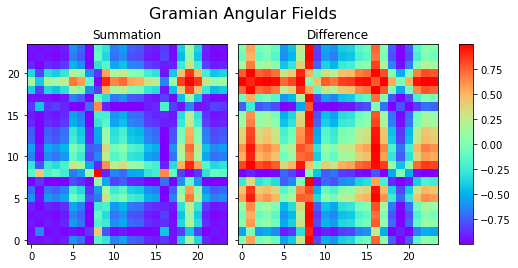

In [12]:
def show_image(images):
    fig = plt.figure(figsize=(8, 4))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 2),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.3,
                     ) 
    titles = ['Summation', 'Difference']
    for image, title, ax in zip(images, titles, grid):
        im = ax.imshow(image, cmap='rainbow', origin='lower')
        ax.set_title(title, fontdict={'fontsize': 12})
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
    plt.show()

images = [mergegasf1[0][0],mergegadf1[0][0]]
show_image(images) 

In [13]:
for i in range(1,16):
    globals()['mergegasf{}'.format(i)] = np.transpose(globals()['mergegasf{}'.format(i)],(1,2,3,0))
    globals()['mergegadf{}'.format(i)] = np.transpose(globals()['mergegadf{}'.format(i)],(1,2,3,0))
# i = 1
# globals()['mergegasf{}'.format(i)] = np.transpose(globals()['mergegasf{}'.format(i)],(1,2,3,0))
# globals()['mergegadf{}'.format(i)] = np.transpose(globals()['mergegadf{}'.format(i)],(1,2,3,0))
len(mergegasf1) #절대 다시돌리면안돼

3125

In [14]:
import os
import tensorflow as tf
from tensorflow import reshape
from collections import OrderedDict
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input,Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from sklearn.metrics import accuracy_score

In [15]:
def make_client(sub):

    X, Y = [],[]
    X = (globals()['mergegasf{}'.format(sub)])
    datalist = []
    for i in range(len(dataset['client'])):
        if dataset['client']['{}'.format(i)] == sub:
            datalist.append(dataset['activity']['{}'.format(i)])
    for i_n in range(len(datalist)//52):
        if datalist[(len(datalist)//(len(datalist)//52))*i_n]-1 == -1:
            Y.append(datalist[(len(datalist)//(len(datalist)//52))*i_n])
        else:
            Y.append(datalist[(len(datalist)//(len(datalist)//52))*i_n]-1) #-1 한 이유 : (1-7)을 (0-6)으로 바꿔줌
    target = Y #onehot
    num = np.unique(target, axis=0)
#     print(num)
    num = num.shape[0]
    Y = np.eye(num)[target]
    
    data_set = tf.data.Dataset.from_tensor_slices((list(X), list(Y)))
    
    return data_set.shuffle(len(Y)).batch(64)#원래는 64
#     return data_set.shuffle(len(Y)).batch(141)#141은 1269의 약수

In [16]:
#outofbouns error - 데이터가 1부터 시작해서 --> (1-7)을 (0-6)으로 바꿔줌
clients_batched = dict()
for i in range(1,13):
    clients_batched[i] = make_client(i)

In [17]:
clients_batched

{1: <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>,
 2: <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>,
 3: <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>,
 4: <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>,
 5: <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>,
 6: <BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>,
 7: <BatchDataset element_spec=(TensorSpec(shape=(No

In [18]:
def make_test(sub):
    X, Y = [],[]
    X = globals()['mergegasf{}'.format(sub)]
    datalist = []
    for i in range(len(dataset['client'])):
        if dataset['client']['{}'.format(i)] == sub:
            datalist.append(dataset['activity']['{}'.format(i)])
            
            
    for i_n in range(len(datalist)//52):
        Y.append(datalist[(len(datalist)//(len(datalist)//52))*i_n]-1) #-1 한 이유 : (1-7)을 (0-6)으로 바꿔줌
    target = Y #onehot
    num = np.unique(target, axis=0)
    num = num.shape[0]
    Y = np.eye(num)[target]
    return X,Y

In [19]:
testX13,testY13 = make_test(13)
testX14,testY14 = make_test(14)
testX15,testY15 = make_test(15)
Xtest = np.concatenate((testX13,testX14,testX15),axis=0)
Ytest = np.concatenate((testY13,testY14,testY15),axis=0)
# Xtest = np.concatenate((testX14,testX15),axis=0)
# Ytest = np.concatenate((testY14,testY15),axis=0)
# Xtest = testX15
# Ytest = testY15

In [20]:
Xtest.shape

(5522, 24, 24, 3)

In [21]:
Ytest.shape

(5522, 7)

In [22]:
testbatched = tf.data.Dataset.from_tensor_slices((Xtest,Ytest)).batch(len(Ytest))
testbatched

<BatchDataset element_spec=(TensorSpec(shape=(None, 24, 24, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>

In [23]:
def create_keras_model():

    # Create keras model
    model = Sequential()

    # 1st convolution layer
    model.add(Input(shape=(24,24,3)))

    model.add(Conv2D(filters=7,kernel_size=(3,3),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

    model.add(Conv2D(filters=14,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

    model.add(Conv2D(filters=21,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
    
    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(7, activation='softmax')) #y가 (None,7)타입이므로

    # Compile the model
    #model.compile(loss=SparseCategoricalCrossentropy(),
    #              optimizer=SGD(learning_rate=0.02),
    #              metrics=[SparseCategoricalAccuracy()])
    
    return model

# Summary model
keras_model = create_keras_model()
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 7)         196       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 7)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 14)        406       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 14)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 21)          1197      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 21)         0

In [25]:
from tensorflow.keras.optimizers import Adam
lr = 0.01  
comms_round = 30
loss='categorical_crossentropy'
metrics = ['CategoricalAccuracy']
# metrics = ['accuracy']
optimizer = SGD(learning_rate=lr, decay=0.005 / comms_round, momentum=0.5)  

In [26]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    logits = model.predict(X_test, batch_size=100)
    # logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1)) 
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [27]:
#initialize global model
import random
global_model = create_keras_model()
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        local_model = create_keras_model()
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=10, verbose=0) #epoch 1: 18% 10 :20% 100 :
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)
    

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in testbatched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)

comm_round: 0 | global_acc: 35.512% | global_loss: 1.8630892038345337
comm_round: 1 | global_acc: 35.331% | global_loss: 1.850809097290039
comm_round: 2 | global_acc: 39.044% | global_loss: 1.8380143642425537
comm_round: 3 | global_acc: 43.734% | global_loss: 1.8230409622192383
comm_round: 4 | global_acc: 45.907% | global_loss: 1.8141535520553589
comm_round: 5 | global_acc: 46.233% | global_loss: 1.8077915906906128
comm_round: 6 | global_acc: 46.958% | global_loss: 1.8030226230621338
comm_round: 7 | global_acc: 47.048% | global_loss: 1.8000154495239258
comm_round: 8 | global_acc: 46.994% | global_loss: 1.7961105108261108
comm_round: 9 | global_acc: 47.374% | global_loss: 1.793364405632019
comm_round: 10 | global_acc: 47.428% | global_loss: 1.791412115097046
comm_round: 11 | global_acc: 47.338% | global_loss: 1.7900913953781128
comm_round: 12 | global_acc: 47.447% | global_loss: 1.788299560546875
comm_round: 13 | global_acc: 47.591% | global_loss: 1.7867146730422974
comm_round: 14 | glo